<h1 style="color:#872325"> Time Series Pandas </h1>

### Elaboró: Jorge Alberto Morúa Amaya
### Clave: 193699
### 23/02/2020

<h2 style="color:crimson">Ejercicios</h2>

En los ejercicios 1 a 5 analizaremos la volatilidad CEMEX (`"CEMEXCPO MF Equity"`).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [13]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 3)

In [4]:
bmv = pd.read_csv("../files/lec02/ipc0019.csv")

In [5]:
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])
bmv.head()

ticker     1746531D GZ Equity                                          \
field                 PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN PX_VOLUME   
date                                                                    
2000-01-03                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-04                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-05                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-06                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-07                NaN     NaN    NaN    NaN     NaN       NaN   

ticker     AC* MF Equity                        ... TLEVICPO MF Equity         \
field            PX_HIGH PX_LAST PX_LOW PX_MID  ...             PX_LOW PX_MID   
date                                            ...                             
2000-01-03           NaN     NaN    NaN    NaN  ...              30.44  30.50   
2000-01-04           NaN     NaN    NaN    NaN  ...              27.30  27.45   
2000-01-05           NaN     NaN    NaN    NaN  ...              25.90  27.15   
2000-01-06           NaN     NaN    NaN    NaN  ...              27.00  27.08   
2000-01-07           NaN     NaN    NaN    NaN  ...              26.75  28.35   

ticker                        WALMEX* MF Equity                                \
field      PX_OPEN  PX_VOLUME           PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN   
date                                                                            
2000-01-03   32.20   680000.0              5.14    4.90   4.75   4.89    4.78   
2000-01-04   28.80  2980000.0              4.83    4.82   4.73   4.83    4.80   
2000-01-05   26.80  3430000.0              5.25    5.21   4.70   5.30    4.80   
2000-01-06   27.30   850000.0              5.34    5.18   5.13   5.18    5.24   
2000-01-07   26.98  2210000.0              5.63    5.51   5.19   5.69    5.19   

ticker                  
field        PX_VOLUME  
date                    
2000-01-03  17132000.0  
2000-01-04  20296000.0  
2000-01-05  20372000.0  
2000-01-06  22904000.0  
2000-01-07  23512000.0  

[5 rows x 210 columns]


1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.


In [6]:
cemex_close = bmv["CEMEXCPO MF Equity"]["PX_LAST"]
cemex_close.index = pd.to_datetime(cemex_close.index)
cemex_close.head()

date
2000-01-03    8.14
2000-01-04    7.62
2000-01-05    7.61
2000-01-06    7.50
2000-01-07    7.58
Name: PX_LAST, dtype: float64

In [7]:
cemex_diff = cemex_close - cemex_close.shift(periods=1)
cemex_diff.fillna(0)

date
2000-01-03    0.00
2000-01-04   -0.52
2000-01-05   -0.01
2000-01-06   -0.11
2000-01-07    0.08
              ... 
2019-09-20    0.22
2019-09-23   -0.14
2019-09-24   -0.05
2019-09-25   -0.01
2019-09-26   -0.01
Name: PX_LAST, Length: 4983, dtype: float64

(array([1.000e+00, 1.000e+00, 4.000e+00, 6.000e+00, 1.100e+01, 3.700e+01,
        7.200e+01, 1.730e+02, 5.780e+02, 1.678e+03, 1.544e+03, 5.530e+02,
        1.830e+02, 6.000e+01, 2.100e+01, 1.500e+01, 3.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00]),
 array([-1.88  , -1.6915, -1.503 , -1.3145, -1.126 , -0.9375, -0.749 ,
        -0.5605, -0.372 , -0.1835,  0.005 ,  0.1935,  0.382 ,  0.5705,
         0.759 ,  0.9475,  1.136 ,  1.3245,  1.513 ,  1.7015,  1.89  ]),
 <a list of 20 Patch objects>)

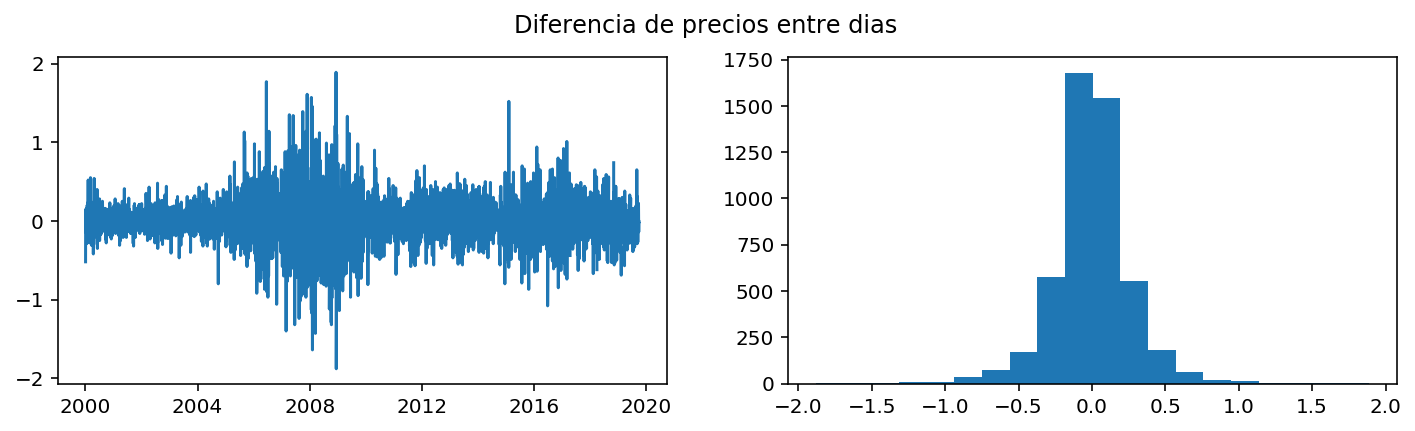

In [14]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Diferencia de precios entre dias')
axs[0].plot(cemex_diff)
axs[1].hist(cemex_diff,bins=20)


----

2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`


In [15]:
n_cd = cemex_diff.loc[cemex_diff.index.min(): "2018-06-1"]
cemex_std = n_cd.resample('Q').std()
cemex_std.describe()

count    74.000000
mean      0.245074
std       0.126611
min       0.088352
25%       0.154807
50%       0.209752
75%       0.300797
max       0.643456
Name: PX_LAST, dtype: float64

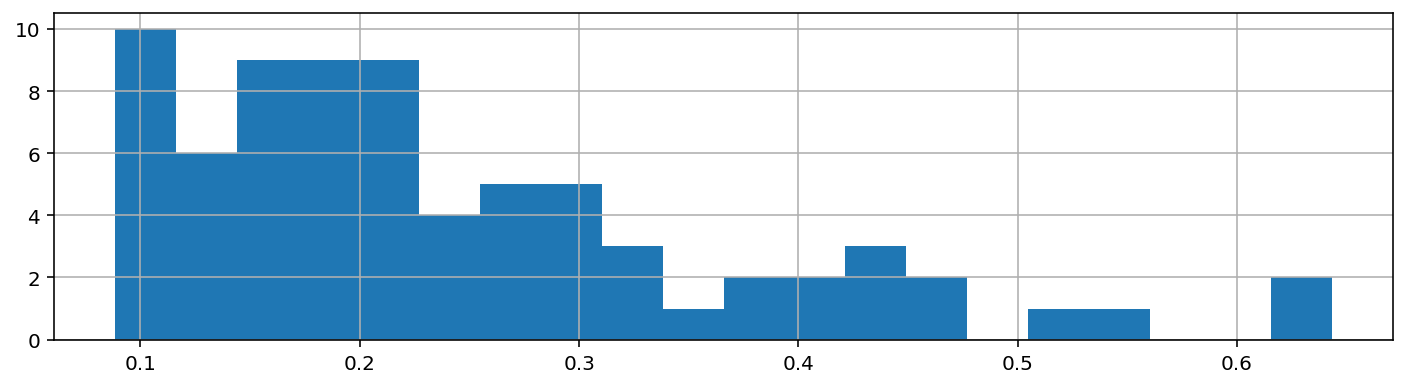

In [16]:
cemex_std.hist(bins=20)

---

3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?

In [17]:
cemex_std = n_cd.resample('W').std()
cemex_std.describe()

count    961.000000
mean       0.222179
std        0.155630
min        0.015166
25%        0.117601
50%        0.183848
75%        0.275717
max        1.570403
Name: PX_LAST, dtype: float64

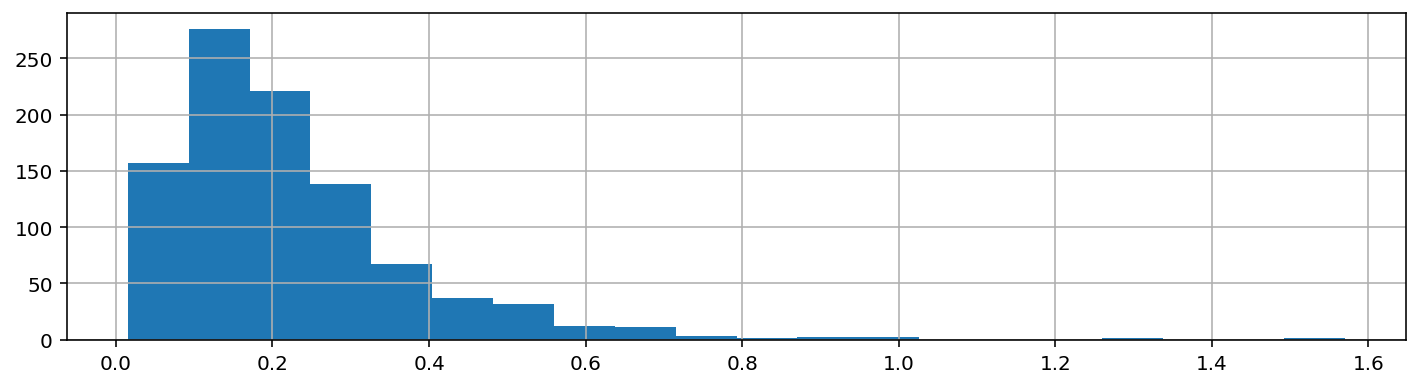

In [18]:
cemex_std.hist(bins=20)

#### Diferencias
La principal diferencia que se encuentra en los gráficos es que en el ejercicio 3 la frecuencia de la desviación estándar aumenta ya que el número de observaciones es mayor ( 961 registros comparados con los 74 registros del ejercicio 2 ),también en este grafico al tener periodos de tiempo más cortos (semanal) el rango de la desviación estándar aumenta y va desde 0.1 hasta 1.5 comparado contra el rango mensual de 0.1 a 0.7;  sin embargo en ambos gráficos se puede observar que la mayoría de los datos se encuentran distribuidos entre 0.1 y 0.4 , así mismo se observa que entre más aumenta la desviación estándar el numero de observaciones disminuye.

---

4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?


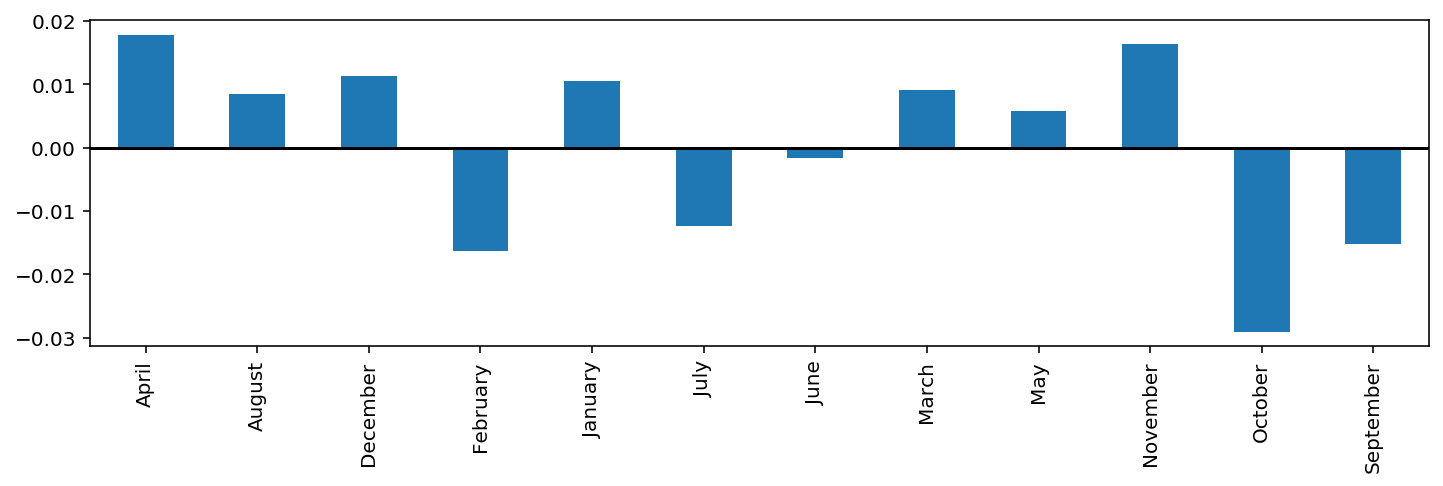

In [19]:
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar").axhline(0, color='black')

#### Explicación:
El código en la primera línea modifica el formato del índice para que solo muestre el nombre del mes (“%B”), los valores generados se almacenan en la variable months la cual se utiliza en la segunda línea de código para agrupar los valores de cemex_diff por mes y obtener su promedio, finalmente se muestran los datos en un gráfico de barras 

El gráfico muestra el promedio de la diferencia de precio diaria agrupada de forma mensual. Podemos observar que en promedio, los meses que el valor decrece son: febrero, junio, julio, septiembre y Octubre, siendo este último el mes con la mayor variación de valor.

---

5. Realiza nuevamente el ejercicio 4 considerando `cemex_close`. ¿Por qué difieren las gráficas?

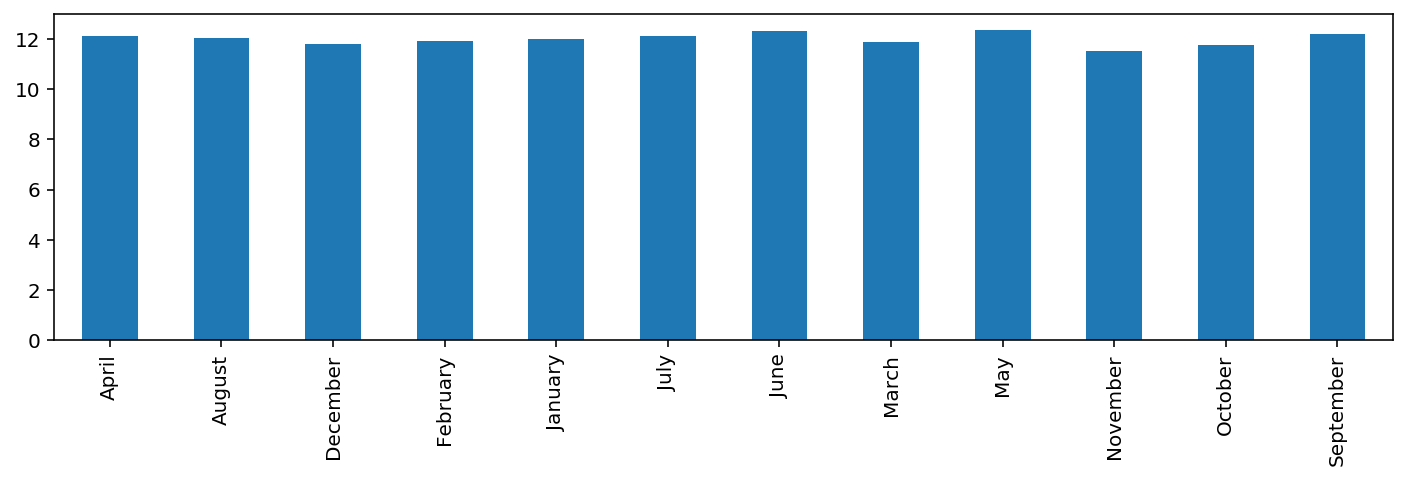

In [20]:
months = cemex_close.index.strftime("%B")
cemex_close.groupby(months).mean().plot(kind="bar")

#### Explicación:
La diferencia se debe principalmente a que en el Ejercicio 4 se está graficando el promedio de las diferencias entre días, por lo cual los valores que obtenemos varían entre -1.88 y 1.89 y en el ejercicio 5 los valores que consideramos son los valores al cierre los cuales son siempre positivos y oscilan entre 2.94 y 29.86, debido a lo anterior el grafico de este ejercicio nos muestra solo valores positivos.